In [33]:
# Importing libraries:

import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import wordcloud
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import string

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jyotibhandari/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/jyotibhandari/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [34]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_train.head()

df_train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


<AxesSubplot:xlabel='label', ylabel='count'>

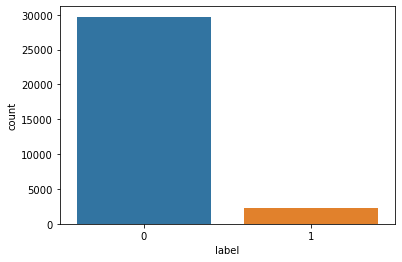

In [35]:
sns.countplot('label',data=df_train)

In [36]:
print("Shape of Train set:", df_train.shape)
print("Shape of Test set:", df_test.shape)

Shape of Train set: (31962, 3)
Shape of Test set: (17197, 2)


In [37]:
df_train.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [38]:
df_train.drop_duplicates(subset=['tweet'], keep='last', inplace=True)
df_train.reset_index(inplace=True)
print("Shape of Train set after removing duplicates:", df_train.shape)

Shape of Train set after removing duplicates: (29530, 4)


In [39]:
df_offensive =pd.read_csv("labeled_data.csv")

In [40]:
df_offensive

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [41]:
df_offensive.isnull().sum()

Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64

In [42]:
df_offensive['class'].unique()

array([2, 1, 0])

In [43]:
df_offensive[df_offensive['class']==0]

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
85,85,3,2,1,0,0,"""@Blackman38Tide: @WhaleLookyHere @HowdyDowdy1..."
89,90,3,3,0,0,0,"""@CB_Baby24: @white_thunduh alsarabsss"" hes a ..."
110,111,3,3,0,0,0,"""@DevilGrimz: @VigxRArts you're fucking gay, b..."
184,186,3,3,0,0,0,"""@MarkRoundtreeJr: LMFAOOOO I HATE BLACK PEOPL..."
202,204,3,2,1,0,0,"""@NoChillPaz: ""At least I'm not a nigger"" http..."
...,...,...,...,...,...,...,...
24576,25084,3,2,1,0,0,this guy is the biggest faggot omfg
24685,25197,3,2,1,0,0,which one of these names is more offensive kik...
24751,25264,3,2,1,0,0,you a pussy ass nigga and I know it nigga.
24776,25289,3,3,0,0,0,you're all niggers


In [44]:
df_offensive["class"].replace({0: 1}, inplace=True)

In [45]:
df_offensive['class'].unique()

array([2, 1])

In [46]:
df_offensive["class"].replace({2: 0}, inplace=True)

In [47]:
df_offensive.drop(['Unnamed: 0','count','hate_speech','offensive_language','neither'],axis=1,inplace=True)

In [48]:
df_offensive

,class,tweet
0,0,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...
24778,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,0,"you've gone and broke the wrong heart baby, an..."
24780,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,1,youu got wild bitches tellin you lies


<AxesSubplot:xlabel='class', ylabel='count'>

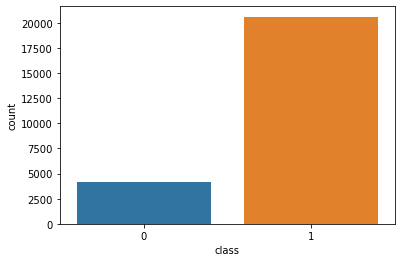

In [49]:
sns.countplot('class',data=df_offensive)

In [50]:
df_offensive.rename(columns ={'class':'label'}, inplace = True)

In [51]:
df_train_final = pd.concat([df_train,df_offensive])

In [52]:
df_train_final

,index,id,label,tweet
0,0.0,1.0,0,@user when a father is dysfunctional and is s...
1,1.0,2.0,0,@user @user thanks for #lyft credit i can't us...
2,2.0,3.0,0,bihday your majesty
3,4.0,5.0,0,factsguide: society now #motivation
4,5.0,6.0,0,[2/2] huge fan fare and big talking before the...
...,...,...,...,...
24778,NaN,NaN,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,NaN,NaN,0,"you've gone and broke the wrong heart baby, an..."
24780,NaN,NaN,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,NaN,NaN,1,youu got wild bitches tellin you lies


In [53]:
df_train_final.drop(['index','id'],axis=1,inplace=True)

In [54]:
df_train_final

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,factsguide: society now #motivation
4,0,[2/2] huge fan fare and big talking before the...
...,...,...
24778,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,0,"you've gone and broke the wrong heart baby, an..."
24780,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,1,youu got wild bitches tellin you lies


<AxesSubplot:xlabel='label', ylabel='count'>

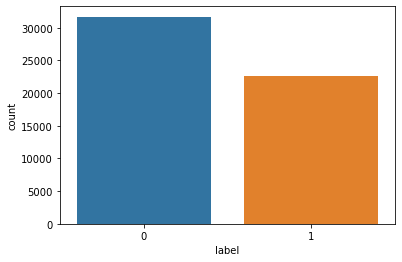

In [55]:
sns.countplot('label',data=df_train_final)

In [56]:
stop_word = stopwords.words('english')
stm = nltk.SnowballStemmer("english")

def text_cleaner(input_text):
    input_text = re.sub(r'@[A-Za-z0-9_]+','',str(input_text))    # Removing @mentions
    input_text = re.sub(r'#','',str(input_text))                 # Removing #tag symbol
    input_text = re.sub(r'RT[\s]+',' ',input_text)          # Remvoing RT
    input_text = re.sub(r'\n','',input_text) 
    input_text = re.sub(r',','',input_text) 
    input_text = re.sub(r'.[.]+','',input_text) 
    input_text = re.sub(r'\w+:\/\/\S+','',input_text) 
    input_text = re.sub(r'https?:\/\/\S+','',input_text)    # Removing hyperlinks
    input_text = re.sub(r'/',' ',input_text)
    input_text = re.sub(r'-',' ',input_text)
    input_text = re.sub(r'_',' ',input_text)
    input_text = re.sub(r'!','',input_text)
    input_text = re.sub(r':',' ',input_text)
    input_text = re.sub(r'$','',input_text)
    input_text = re.sub(r'%','',input_text)
    input_text = re.sub(r'^','',input_text)
    input_text = re.sub(r'&','',input_text)
    input_text = re.sub(r'=',' ',input_text)
    input_text = re.sub(r' +',' ',input_text) 
    input_text = re.sub('\[.*?\]', '', input_text)
    input_text = re.sub('https?://\S+|www\.\S+', '', input_text)
    input_text = re.sub('<.*?>+', '', input_text)
    input_text = re.sub('[%s]' % re.escape(string.punctuation), '', input_text)
    input_text = re.sub('\n', '', input_text)
    input_text = re.sub('\w*\d\w*'|, '', input_text)
    input_text = re.sub('[0-9]+', '', input_text) # removing numbers
    input_text = str(input_text).lower() # converting to lowercase 
    input_text = str(input_text).strip()  # Removing all the leading and trailing whitespaces present in the input data 
    input_text = [word for word in input_text.split(' ') if word not in stop_word]
    input_text=" ".join(input_text)
    input_text = [stm.stem(word) for word in input_text.split(' ')]
    input_text=" ".join(input_text)
    return input_text

In [66]:
def emoji_cleaner(input_text):
    return input_text.encode('ascii', 'ignore').decode('ascii')

In [67]:
df_train_final['tweet']=df_train_final['tweet'].apply(text_cleaner)


In [68]:
df_train_final

,label,tweet
0,0,father dysfunct selfish drag kid dysfunctio run
1,0,thank lyft credit cant use caus dont offer whe...
2,0,bihday majesti
3,0,factsguid societi motiv
4,0,huge fan fare big talk leav chao pay disput ge...
...,...,...
24778,1,yous muthafin lie right tl trash mine bibl scr...
24779,0,youv gone broke wrong heart babi drove redneck...
24780,1,young buck wanna eat dat nigguh like aint fuck...
24781,1,youu got wild bitch tellin lie


In [69]:
df_test['tweet']=df_test['tweet'].apply(text_cleaner)
df_test['tweet']=df_test['tweet'].apply(emoji_cleaner)

In [70]:
df_test

,id,tweet
0,31963,studiolif aislif requir passion dedic willpow ...
1,31964,white supremacist want everyon see new bird movi
2,31965,safe way heal acn altwaystoh healthi heal
3,31966,hp cur child book reserv alreadi yes harrypott...
4,31967,bihday amaz hilari nephew eli ahmir uncl dave ...
...,...,...
17192,49155,thought factori left right polari trump leader...
17193,49156,feel like mermaid hairflip neverreadi formal w...
17194,49157,hillari campaign today ohioomg amp use word li...
17195,49158,happi work confer right mindset lead cultur de...


In [71]:
X = df_train_final['tweet'].astype(str)  # Converting to string, because vectorizer does'nt accept list.
y = df_train_final['label'].astype(str)  # Converting to string, because vectorizer does'nt accept list.
X_train, X_test, y_train, y_test =  train_test_split(X, y, train_size = 0.8, random_state = 3) 


In [72]:
# Extracting features using TF-IDF (1,2) - unigrams and bigrams
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

No. of feature_words:  246340


In [73]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

In [328]:
# making a dictionary with four models with some parameters:
models = {
    
    'SVC' :{
        'model' : SVC(),
        'parameters' : {
            'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf','linear','poly','sigmoid']
        }
    },

    'MultinomialNB' :{
        'model' : MultinomialNB(),
        'parameters' : {
            'alpha' : np.linspace(0.5, 1.5, 6), 'fit_prior' : [True, False]
        }
    },
    
    'logistics_regression' :{
        'model' : LogisticRegression(solver = 'lbfgs', multi_class = 'auto'),
        'parameters' : {
            'C' : [0.1, 1, 10, 50, 60, 90, 100], 'solver' : ['lbfgs', 'liblinear']
        }
    },
    
    'random_forest' :{
        'model' : RandomForestClassifier(),
        'parameters' : {
            'n_estimators' : [80,85,90,95,100], 
            'max_depth':[20,30,None], 'criterion':['gini','entropy']
        }
    }
}

In [329]:
# implemented GridSearchCV for four models using a loop and a previously created dictionary
# in the created variable 'scores', results are stored for each model such as: model, best_score and best_params.

score = []

for model_name, mp in models.items():
    clf = GridSearchCV(mp['model'], mp['parameters'], cv=5, n_jobs=-1) # Using Cross Validation of 5 and n_jobs=-1 for fast training by using all the processors
    print(mp['model'])
    print('\nFitting...')
    best_model = clf.fit(X_train, y_train)                      # Training the model
    clf_pred = best_model.predict(X_test)                       # Predicting the results
    print(confusion_matrix(y_test,clf_pred))                    # Printing Confusion Matrix
    print(metrics.classification_report(y_test, clf_pred))      # Printing Classification Report
    score.append({                                              # Appending results to 'scores' list
        'model' : model_name,
        'best_accuracy' : best_model.score(X_test, y_test),
        'best_parameters' : clf.best_params_
    })
    print('\nThe score is appended to the list...\n')
    
# Creating DataFrame with model, best_accuracy and best_parameters:
res = pd.DataFrame(score, columns=['model', 'best_accuracy', 'best_parameters'])
res

SVC()

Fitting...
[[6091  288]
 [ 311 4173]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      6379
           1       0.94      0.93      0.93      4484

    accuracy                           0.94     10863
   macro avg       0.94      0.94      0.94     10863
weighted avg       0.94      0.94      0.94     10863


The score is appended to the list...

MultinomialNB()

Fitting...
[[6012  367]
 [ 527 3957]]
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      6379
           1       0.92      0.88      0.90      4484

    accuracy                           0.92     10863
   macro avg       0.92      0.91      0.91     10863
weighted avg       0.92      0.92      0.92     10863


The score is appended to the list...

LogisticRegression()

Fitting...


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[[6090  289]
 [ 339 4145]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      6379
           1       0.93      0.92      0.93      4484

    accuracy                           0.94     10863
   macro avg       0.94      0.94      0.94     10863
weighted avg       0.94      0.94      0.94     10863


The score is appended to the list...

RandomForestClassifier()

Fitting...
[[6025  354]
 [ 361 4123]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      6379
           1       0.92      0.92      0.92      4484

    accuracy                           0.93     10863
   macro avg       0.93      0.93      0.93     10863
weighted avg       0.93      0.93      0.93     10863


The score is appended to the list...



,model,best_accuracy,best_parameters
0,SVC,0.944859,"{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}"
1,MultinomialNB,0.917702,"{'alpha': 0.9, 'fit_prior': True}"
2,logistics_regression,0.942189,"{'C': 100, 'solver': 'lbfgs'}"
3,random_forest,0.934180,"{'criterion': 'gini', 'max_depth': None, 'n_es..."


In [343]:
model1= MultinomialNB().fit(X_train, y_train)
prediction1=model1.predict(X_test)
print(confusion_matrix(y_test,prediction1))
print (metrics.classification_report(y_test, prediction1))

[[6024  355]
 [ 538 3946]]
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      6379
           1       0.92      0.88      0.90      4484

    accuracy                           0.92     10863
   macro avg       0.92      0.91      0.91     10863
weighted avg       0.92      0.92      0.92     10863



In [344]:
model2= SVC().fit(X_train, y_train)
prediction2=model2.predict(X_test)
print(confusion_matrix(y_test,prediction2))
print (metrics.classification_report(y_test, prediction2))

[[6205  174]
 [ 452 4032]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      6379
           1       0.96      0.90      0.93      4484

    accuracy                           0.94     10863
   macro avg       0.95      0.94      0.94     10863
weighted avg       0.94      0.94      0.94     10863



In [345]:
model3= LogisticRegression(solver = 'lbfgs', multi_class = 'auto').fit(X_train, y_train)
prediction3=model3.predict(X_test)
print(confusion_matrix(y_test,prediction3))
print (metrics.classification_report(y_test, prediction3))

[[6168  211]
 [ 515 3969]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      6379
           1       0.95      0.89      0.92      4484

    accuracy                           0.93     10863
   macro avg       0.94      0.93      0.93     10863
weighted avg       0.93      0.93      0.93     10863



In [65]:
prediction2

NameError: name 'prediction2' is not defined

In [1]:
l=np.arange(1153)
l1=[l,prediction2]
l=np.asarray(l1)

NameError: name 'np' is not defined

In [349]:
l

array([array([   0,    1,    2, ..., 1150, 1151, 1152]),
       array(['0', '1', '0', ..., '1', '0', '1'], dtype=object)],
      dtype=object)

In [ ]:
from keras.preprocessing.text import Tokenizer
max_words = 50000
max_len = 300
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
sequences = tokenizer.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)
test_sequences = tokenizer.texts_to_sequences(x_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)